Modify the scratch code of gaussian mixture clustering in our lecture:
- Modify so it performs early stopping when the log likelihood does not improve anymore.  Note that if you log the normal distribution, you will get negative sign.  Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.
- Perform plotting every 5 iterations on the resulting clusters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

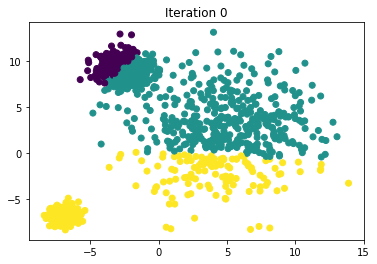

Negative log: -37789.75971146482
Difference: 37789.75971146482


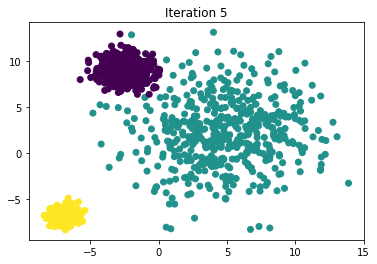

Negative log: -351851.2718132342
Difference: 118903.38214144018


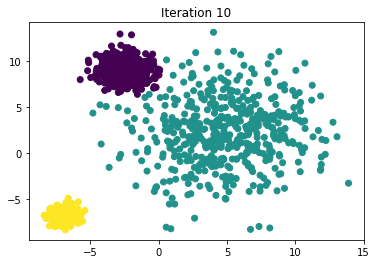

Negative log: -640941.3447467999
Difference: 136.43622798565775
Final negative log: -640864.8525924387
Final diff: 2.3363790700677782


Text(0.5, 1.0, 'Final')

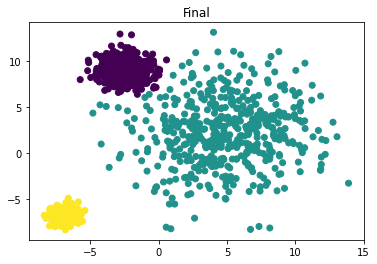

In [13]:
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import math

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 20
old_negative_log = 0

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi

#mean
random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i])
        
        
    # calc negative log
    negative_log = 0
    for i in range(m):
        for k in range(K):
            negative_log += math.log(pi[k])
            negative_log += multivariate_normal.logpdf(X[i], mean=mean[:, k], cov=cov[k])
    
    # Plot every 5 iters
    if (iteration % 5 == 0):
        preds = np.argmax(r, axis=1)
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration {iteration}")
        plt.show()
        
        print(f"Negative log: {negative_log}")
        print(f"Difference: {math.fabs(negative_log - old_negative_log)}")
        
    # early stopping by calculating negative log between previous iter
    if (math.fabs(negative_log - old_negative_log) < 5):
        print("================================")
        print(f"Final negative log: {negative_log}")
        print(f"Final diff: {math.fabs(negative_log - old_negative_log)}")
        break
    old_negative_log = negative_log
        
    
    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0)
    assert NK.shape == (K, )
    
    #PI
    pi = NK / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / NK
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    cov = np.zeros((K, n, n))
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]
    assert cov.shape == (K, n, n)
        

#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")